In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [6]:
iris = datasets.load_iris()

print(iris.feature_names)
print(iris.target_names)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=109) # 70% training and 30% test

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [14]:
from sklearn.svm import SVC         # da scrivere
from sklearn.svm import LinearSVC

#TO DO : create linear SVC objects using two different classes    
svc1 = SVC(kernel='linear')
svc2 = LinearSVC(max_iter=30000)   # fix the waring "can't converge"

#TO DO : feed the data
svc1 = svc1.fit(X_train, y_train)
svc2 = svc2.fit(X_train, y_train)

#TO DO : compute prediction on test data
y_pred1 = svc1.predict(X_test)
y_pred2 = svc2.predict(X_test)

#TO DO Model Accuracy, how often is the classifier correct?
# a cross-validation test must be performed for a good testing phase!!
print("Accuracy SVC:        ", metrics.accuracy_score(y_test, y_pred1))
print("Accuracy Linear SVC: ", metrics.accuracy_score(y_test, y_pred2))

Accuracy SVC:         0.9555555555555556
Accuracy Linear SVC:  0.9333333333333333


Text(0.5, 1.0, 'scv vis decision boundaries')

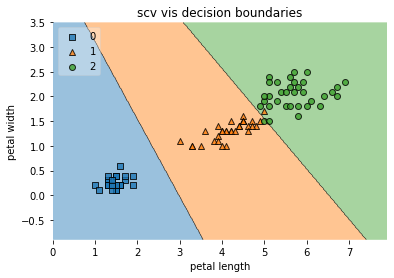

In [17]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

svc_vis = SVC(kernel="linear", decision_function_shape='ovo') 
svc_vis = svc_vis.fit(X_train[:, 2:4], y_train) 

#TO DO : plot decision_regions
plot_decision_regions(X_train[:, 2:4], y_train, clf = svc_vis, legend = 2)

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("scv vis decision boundaries")

Text(0.5, 1.0, 'scv2 vis decision boundaries')

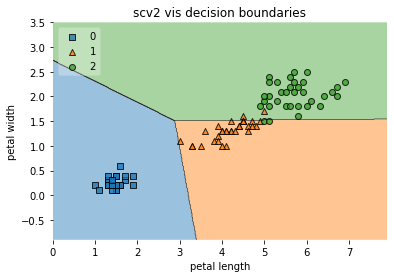

In [18]:
svc2_vis = LinearSVC(max_iter=30000)            # fix "can't converge" warning
svc2_vis = svc2_vis.fit(X_train[:, 2:4], y_train) 

#TO DO : plot decision_regions
plot_decision_regions(X_train[:, 2:4], y_train, clf = svc2_vis, legend = 2)

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("scv2 vis decision boundaries")

In [21]:
import pandas as pd

#TO DO : read csv 
iris_modified = pd.read_csv('./iris_modified_redundantAttib.csv')

print(iris_modified.head())

   sepal_length  sepal_width  petal_length  petal_width  target species  \
0           5.1          3.5           1.4          0.2       0  setosa   
1           4.9          3.0           1.4          0.2       0  setosa   
2           4.7          3.2           1.3          0.2       0  setosa   
3           4.6          3.1           1.5          0.2       0  setosa   
4           5.0          3.6           1.4          0.2       0  setosa   

   random_values  new_attribute_1  new_attribute_2  new_attribute_3  \
0       2.037947        10.473353         7.212637         2.932948   
1       1.939475         9.825746         6.140744         3.037584   
2       1.919324         9.392233         6.513247         2.866531   
3       1.997273         9.618824         6.622916         3.427279   
4       2.016114        10.247828         7.425268         2.989817   

   new_attribute_4  new_attribute_5  
0         0.487411         5.005036  
1         0.710214         5.052914  
2       

In [22]:
train_x, test_x, train_y, test_y = train_test_split(iris_modified[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','new_attribute_1','new_attribute_2','new_attribute_3', 'new_attribute_4', 'new_attribute_5']], iris_modified['target'], test_size=0.3, random_state = 109)


In [23]:
svc = SVC(kernel="linear")

svc = svc.fit(train_x, train_y)
y_pred = svc.predict(test_x)

# TO DO :Model Accuracy, how often is the classifier correct?
print("Accuracy SVC (redundant iris attributes): ", metrics.accuracy_score(y_test, y_pred))

Accuracy SVC (redundant iris attributes):  0.8888888888888888


In [31]:
non_linear_data = pd.read_csv('./non_linear_data.csv')

non_linear_data.drop(columns=['Unnamed: 0'], inplace=True)
non_linear_data


,x,y,c
0,8.280736,-2.686364,1
1,-6.172844,0.087210,1
2,-5.288424,3.531021,1
3,0.692070,7.485991,0
4,-0.429500,-4.325458,0
...,...,...,...
495,-4.153667,-0.918453,1
496,4.345009,6.839095,0
497,-4.885218,-4.132881,1
498,1.583056,-0.002913,1


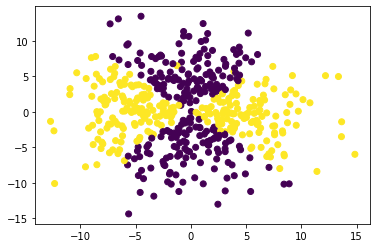

In [32]:
plt.scatter(x = non_linear_data.x, y = non_linear_data.y, c = non_linear_data.c)

In [33]:
import numpy as np

#TO DO : convert data to numpy data structures

points  = np.asarray(non_linear_data[['x', 'y']])
labels  = np.asarray(non_linear_data['c'])

#split the data into training and testing
train_points, test_points , train_labels, test_labels = train_test_split(points, labels, test_size = 0.2, random_state = 19)

In [42]:
# TO DO: verify the accuracy for any model that can handle non linearly separable data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=200) # 5: good 15: good 50: good  200: bad
knn = knn.fit(train_points, train_labels)

y_pred = knn.predict(test_points)

print("KNN Accuracy: ", metrics.accuracy_score(test_labels, y_pred))

KNN Accuracy:  0.73


In [ ]:
# TO DO: verify the accuracy for linear SVM model


NB Accuracy:  0.95


kNN Accuracy:  0.97


In [45]:
svc = SVC(kernel='linear')
svc = svc.fit(train_points, train_labels)

y_pred = svc.predict(test_points)

print("SVC(Linear) Accuracy", metrics.accuracy_score(test_labels, y_pred))

SVC(Linear) Accuracy 0.51


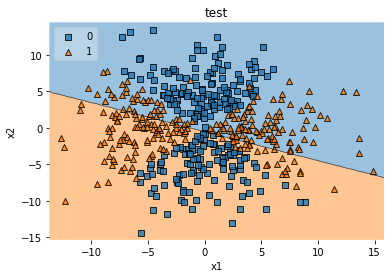

In [47]:
plot_decision_regions(points, labels, clf=svc, legend =2)

# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('test')
plt.show()

SVC(Non Linear) Accuracy 0.99


Text(0.5, 1.0, 'test')

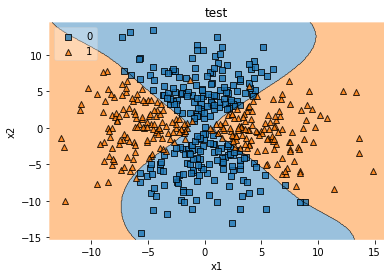

In [53]:
# TO DO: create, train and test a non linear SVM model, kernel=rbf
nonlinear_svc = SVC(kernel='rbf')
nonlinear_svc = nonlinear_svc.fit(train_points, train_labels)
y_pred = nonlinear_svc.predict(test_points)

print("SVC(Non Linear) Accuracy", metrics.accuracy_score(test_labels, y_pred))

# Plotting decision regions
plot_decision_regions(points, labels, clf=nonlinear_svc, legend=2)

# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('test')

SVC(Non Linear) Accuracy 0.88


Text(0.5, 1.0, 'test')

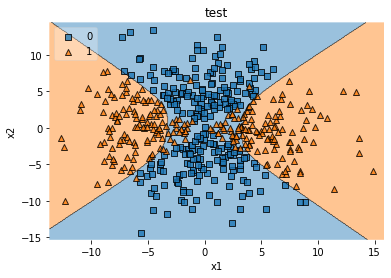

In [54]:
# TO DO: create, train and test a non linear SVM model, kernel=poly
nonlinear_svc = SVC(kernel='poly', degree=4)
nonlinear_svc = nonlinear_svc.fit(train_points, train_labels)
y_pred = nonlinear_svc.predict(test_points)

print("SVC(Non Linear) Accuracy", metrics.accuracy_score(test_labels, y_pred))

# Plotting decision regions
plot_decision_regions(points, labels, clf=nonlinear_svc, legend=2)

# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('test')

In [75]:
##Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#TO DO : Initializing the MLPClassifier #with no hidden layers- vanilla model - train and test. 
#        check accuracy both for the training and test; print the learning process
net = MLPClassifier(hidden_layer_sizes=(), max_iter=500, verbose=False) # default relu
net = net.fit(X_train, y_train)

y_pred_train = net.predict(X_train)
y_pred       = net.predict(X_test)

print(net)
print("MLP Accuracy (train): ", metrics.accuracy_score(y_train, y_pred_train))
print("MLP Accuracy (test) : ", metrics.accuracy_score(y_test, y_pred))

MLPClassifier(hidden_layer_sizes=(), max_iter=500)
MLP Accuracy (train):  0.8095238095238095
MLP Accuracy (test) :  0.7777777777777778


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [80]:
#TO DO : Initializing the MLPClassifier #with hidden layers - train and test. 
#        check accuracy both for the training and test; print the learning process
net_hidden = MLPClassifier(hidden_layer_sizes=(100, 150, 100), max_iter=500, verbose=False) # default relu
net_hidden = net_hidden.fit(X_train, y_train)

y_pred_train = net_hidden.predict(X_train)
y_pred       = net_hidden.predict(X_test)

print(net_hidden)
print("MLP-Hidden Accuracy (train): ", metrics.accuracy_score(y_train, y_pred_train))
print("MLP-Hidden Accuracy (test) : ", metrics.accuracy_score(y_test, y_pred))

MLPClassifier(hidden_layer_sizes=(100, 150, 100), max_iter=500)
MLP-Hidden Accuracy (train):  1.0
MLP-Hidden Accuracy (test) :  0.9333333333333333
